In [19]:
import pandas as pd
from datetime import datetime

# Downloads

In [55]:
downloads = pd.read_csv('data/clean/output_data.csv', index_col = 0)
downloads['month'] = downloads['month'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

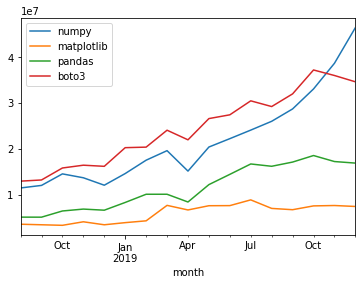

In [87]:
for proj in ['numpy', 'matplotlib', 'pandas', 'boto3']:
    downloads[downloads['project'] == proj].set_index('month')['2018':'2019']['num_downloads'].rename(proj).plot()
plt.legend()
plt.show()

In [102]:
# download system was different before 2018/7/1
downloads = downloads[(downloads['month']>datetime(2018,7,1)) & (downloads['month']<datetime(2023,9,1))]

In [103]:
val_counts = downloads['project'].value_counts()
complete_time = val_counts[val_counts == val_counts.max()].index.tolist()

In [104]:
complete_downloads = downloads[downloads['project'].isin(complete_time)]

In [193]:
top100_downloads = complete_downloads.groupby('project')['num_downloads'].sum().sort_values().tail(100).index.tolist()
all_projs = len(complete_downloads['project'].unique())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

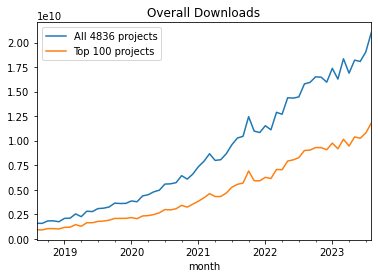

In [197]:
complete_downloads.groupby('month')['num_downloads'].sum().rename(f'All {all_projs} projects').plot(title = 'Overall Downloads')
complete_downloads[complete_downloads['project'].isin(top100_downloads)].groupby('month')['num_downloads'].sum().rename('Top 100 projects').plot()
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

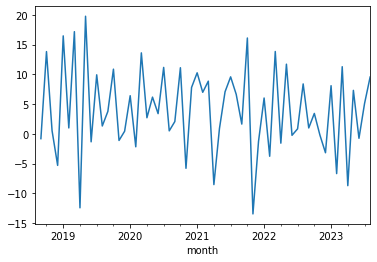

In [170]:
complete_downloads_sum = complete_downloads.groupby('month')['num_downloads'].sum()
(complete_downloads_sum.diff()/complete_downloads_sum*100).plot()
plt.show()

# Repositories

In [231]:
repos = [ele for ele in pd.Series(downloads['repository'].unique()).apply(lambda x: "/".join(x.split("/")[-2:]) if 'github' in x else "") \
         if "/"  in ele]

In [247]:
pd.Series(repos).to_csv('data/queries/github_repos2.csv')

0              2captcha/2captcha-python
1                     archinetai/a-unet
2                    abersheeran/a2wsgi
3                    metagriffin/aadict
4                    rsalmei/about-time
                     ...               
5937                fonttools/py-zopfli
5938          indygreg/python-zstandard
5939    sergey-dryabzhinsky/python-zstd
5940              LamaAni/zthreading.py
5941             dwolfhub/zxcvbn-python
Length: 5942, dtype: object